## Визуальный анализ данных

In [8]:
pip install pandas seaborn openpyxl numpy scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 10.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/38.5 MB 6.8 MB/s eta 0:00:06
   --- ------------------------------------ 3.1/38.5 MB 5.7 MB/s eta 0:00:07
   ---- ----------------------------------- 4.5/38.5 MB 5.6 MB/s eta 0:00:07
   ----- ---------------------------------- 5.8/38.5 MB 5.8 MB/s eta 0:00:06
   ------ --------------------------------- 6.6/38.5 MB 5.6 MB/s eta 0:00:06
   ------- -------------------------------- 7.3/38.5 MB 5.3 MB/s eta 0:00:06
   -------- ------------------------------- 7.9/38.5 MB 5.0 MB/s eta 0:00:07
   -------- ------------------------------- 8.4/38.5 MB 4.6 MB/s eta 0:00:07
   -------- ------------------------------- 8.7/38.5 MB 4.4 MB/s eta 0:00:07
   --------- ------------------------------ 8.9/38.5 MB 4.1 MB/s eta 0:00:08
   --------- ------------------------------ 9.2/38.5 MB 3.9 MB/s eta 0:00:08
   --

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('used_cars_data.csv')

In [2]:
num_col  = "Price"
num_col2 = "Kilometers_Driven"
cat_col  = "Fuel_Type"

#### Гистограмма

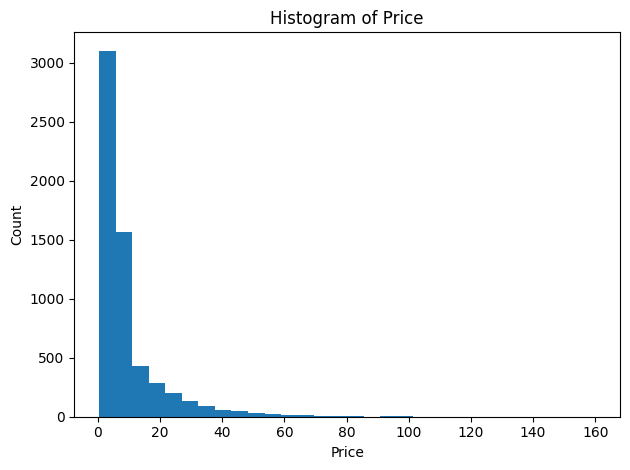

In [7]:
data = pd.to_numeric(df[num_col], errors="coerce").dropna()

plt.figure()
plt.hist(data, bins=30)
plt.title(f"Histogram of {num_col}")
plt.xlabel(num_col); plt.ylabel("Count")
plt.tight_layout(); plt.show()

#### KDE

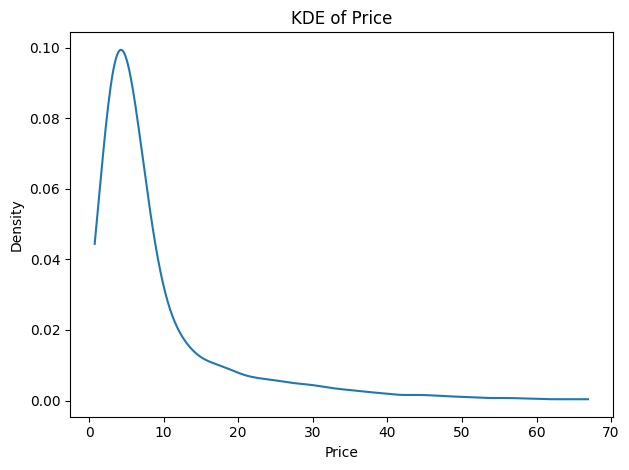

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde  # <--- вот этого не хватало

# === настройки ===
col = "Price"        # замени на свой столбец при необходимости

# === очистка данных ===
x = pd.to_numeric(df[col], errors="coerce")   
x = x.dropna()

if x.size < 2 or np.isclose(x.std(ddof=1), 0):
    raise ValueError(f"Недостаточно вариации в '{col}' после очистки для KDE.")

# ограничим хвосты, чтобы график не «сплющивался» из-за выбросов
lo, hi = np.quantile(x, [0.005, 0.995])
if not (np.isfinite(lo) and np.isfinite(hi)) or lo >= hi:
    lo, hi = x.min(), x.max()

xs = np.linspace(lo, hi, 400)

# === KDE и график ===
kde = gaussian_kde(x.values)
plt.figure()
plt.plot(xs, kde(xs))
plt.title(f"KDE of {col}")
plt.xlabel(col)
plt.ylabel("Density")
plt.tight_layout()
plt.show()

#### Boxplot

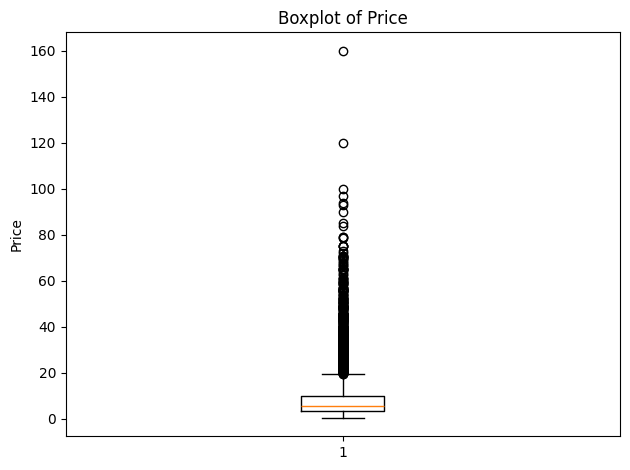

In [10]:
data = pd.to_numeric(df[num_col], errors="coerce").dropna()

plt.figure()
plt.boxplot(data, vert=True, showfliers=True)
plt.title(f"Boxplot of {num_col}")
plt.ylabel(num_col)
plt.tight_layout(); plt.show()

#### EDCF

In [ ]:
x = pd.to_numeric(df[num_col], errors="coerce").dropna().values
x_sorted = np.sort(x)
y = np.arange(1, x_sorted.size + 1) / x_sorted.size

plt.figure()
plt.step(x_sorted, y, where="post")
plt.title(f"ECDF of {num_col}")
plt.xlabel(num_col); plt.ylabel("ECDF")
plt.tight_layout(); plt.show()

#### Bar chart (каунтер) по типам двигателя  

In [ ]:
counts = df[cat_col].astype(str).value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title(f"Bar chart of {cat_col} (Top 10)")
plt.xlabel(cat_col); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

#### Violin plot

In [ ]:
top_cats = df[cat_col].astype(str).value_counts().head(8).index.tolist()
data_per_cat = [
    pd.to_numeric(df.loc[df[cat_col].astype(str) == c, num_col], errors="coerce").dropna().values
    for c in top_cats
]

plt.figure()
plt.violinplot(data_per_cat, showmeans=True, showmedians=True, showextrema=True)
plt.title(f"Violin plot of {num_col} by {cat_col}")
plt.xlabel(cat_col); plt.ylabel(num_col)
plt.xticks(ticks=np.arange(1, len(top_cats)+1), labels=top_cats, rotation=45, ha="right")
plt.tight_layout(); plt.show()

#### Scatter

In [ ]:
# цена vs сидения
x = pd.to_numeric(df['Seats'], errors="coerce")
y = pd.to_numeric(df[num_col],  errors="coerce")
mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], s=10, alpha=0.5)
plt.title(f"Scatter: Seats vs {num_col}")
plt.xlabel(num_col2); plt.ylabel(num_col)
plt.tight_layout(); plt.show()

In [ ]:
# цена vs пробег
x = pd.to_numeric(df[num_col2], errors="coerce")
y = pd.to_numeric(df[num_col],  errors="coerce")
mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], s=10, alpha=0.5)
plt.title(f"Scatter: {num_col2} vs {num_col}")
plt.xlabel(num_col2); plt.ylabel(num_col)
plt.tight_layout(); plt.show()

#### Hexbin (плотность точек в 2D)

In [ ]:
x = pd.to_numeric(df['Seats'], errors="coerce")
y = pd.to_numeric(df[num_col],  errors="coerce")
mask = x.notna() & y.notna()

plt.figure()
hb = plt.hexbin(x[mask], y[mask], gridsize=40, mincnt=1)
plt.title(f"Hexbin: {num_col2} vs {num_col}")
plt.xlabel(num_col2); plt.ylabel(num_col)
cb = plt.colorbar(hb); cb.set_label("count")
plt.tight_layout(); plt.show()

In [ ]:
x = pd.to_numeric(df[num_col2], errors="coerce")
y = pd.to_numeric(df[num_col],  errors="coerce")
mask = x.notna() & y.notna()

plt.figure()
hb = plt.hexbin(x[mask], y[mask], gridsize=40, mincnt=1)
plt.title(f"Hexbin: {num_col2} vs {num_col}")
plt.xlabel(num_col2); plt.ylabel(num_col)
cb = plt.colorbar(hb); cb.set_label("count")
plt.tight_layout(); plt.show()

## Статистический анализ и визуализация данных


#### Показатели центральной тенденции: среднее, медиана, мода

In [11]:
from scipy import stats

s = pd.to_numeric(df[num_col], errors="coerce").dropna()

mean_val   = s.mean()
median_val = s.median()
mode_vals  = s.mode()              
mode_val   = mode_vals.iloc[0] if len(mode_vals) > 0 else np.nan

print(f"Mean:   {mean_val:.4f}")
print(f"Median: {median_val:.4f}")
print(f"Mode:   {mode_val:.4f}")
print(f"All modes (head): {mode_vals.head().tolist()}")

Mean:   9.4795
Median: 5.6400
Mode:   4.5000
All modes (head): [4.5]


#### Меры разброса: размах, дисперсия, стандартное отклонение, IQR, MAD

In [ ]:
s = pd.to_numeric(df[num_col], errors="coerce").dropna()

data_range = s.max() - s.min()
variance   = s.var(ddof=1)          
stdev      = s.std(ddof=1)          
q1, q3     = np.percentile(s, [25, 75])
iqr        = q3 - q1
mad        = stats.median_abs_deviation(s, scale='normal', nan_policy='omit')

print(f"Range (max - min): {data_range:.4f}")
print(f"Variance (ddof=1): {variance:.4f}")
print(f"Std dev  (ddof=1): {stdev:.4f}")
print(f"IQR (Q3-Q1):       {iqr:.4f}  [Q1={q1:.4f}, Q3={q3:.4f}]")
print(f"MAD (robust):      {mad:.4f}")

#### Форма распределения: асимметрия (skewness), эксцесс (kurtosis)

In [ ]:
s = pd.to_numeric(df[num_col], errors="coerce").dropna()

skew_val  = stats.skew(s, bias=False, nan_policy='omit')
kurt_val  = stats.kurtosis(s, fisher=True, bias=False, nan_policy='omit')

print(f"Skewness: {skew_val:.4f}")
print(f"Kurtosis (excess): {kurt_val:.4f}")

#### Корреляция признаков: Пирсон, Спирмен, Кендалл (матрицы и пара столбцов)

In [ ]:
num_df = df.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).dropna(axis=0, how="any")

pearson_corr  = num_df.corr(method="pearson")
spearman_corr = num_df.corr(method="spearman")
kendall_corr  = num_df.corr(method="kendall")

print("Pearson correlation (matrix):")
display(pearson_corr)

print("Spearman correlation (matrix):")
display(spearman_corr)

print("Kendall correlation (matrix):")
display(kendall_corr)

# Корреляции для конкретной пары num_col & num_col2
x = pd.to_numeric(df[num_col],  errors="coerce")
y = pd.to_numeric(df[num_col2], errors="coerce")
mask = x.notna() & y.notna()

from scipy import stats
print("\nPairwise correlations:")
print("Pearson :", stats.pearsonr(x[mask], y[mask]))
print("Spearman:", stats.spearmanr(x[mask], y[mask]))
print("Kendall :", stats.kendalltau(x[mask], y[mask]))

#### Групповые статистики: сводка по категориям, разница средних, сравнение распределений (KS-тест)

In [ ]:
# Сводка по категориям
g = df[[cat_col, num_col]].copy()
g[num_col] = pd.to_numeric(g[num_col], errors="coerce")
summary = (
    g.dropna()
     .groupby(cat_col)[num_col]
     .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
     .sort_values('count', ascending=False)
)
display(summary)

# Выберем две самые частые категории
top_two = summary.index[:2].tolist()
if len(top_two) >= 2:
    a = g.loc[g[cat_col] == top_two[0], num_col].dropna().values
    b = g.loc[g[cat_col] == top_two[1], num_col].dropna().values

    # Разница средних
    diff_means = np.mean(a) - np.mean(b)

    # Сравнение распределений (двухвыборочный KS-тест)
    ks_stat, ks_p = stats.ks_2samp(a, b, alternative='two-sided', method='auto')

    print(f"\nTop groups: {top_two[0]} vs {top_two[1]}")
    print(f"Mean({top_two[0]}) - Mean({top_two[1]}): {diff_means:.4f}")
    print(f"KS test: statistic={ks_stat:.4f}, p-value={ks_p:.4g}")
else:
    print("Недостаточно категорий для попарного сравнения.")

#### Доверительный интервал для среднего (t-интервал, 95%)

In [12]:
s = pd.to_numeric(df[num_col], errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()

alpha = 0.05
n  = s.size
m  = s.mean()
sd = s.std(ddof=1)
se = sd / np.sqrt(n)

t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_low, ci_high = m - t_crit*se, m + t_crit*se

print(f"{int((1-alpha)*100)}% CI for mean of {num_col}: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"n={n}, mean={m:.4f}, sd={sd:.4f}, se={se:.4f}, t*={t_crit:.4f}")

95% CI for mean of Price: [9.1968, 9.7622]
n=6019, mean=9.4795, sd=11.1879, se=0.1442, t*=1.9604


#### t-тест для двух независимых групп (Welch, неравные дисперсии)

In [13]:
# Возьмём две самые частые категории
g = df[[cat_col, num_col]].copy()
g[num_col] = pd.to_numeric(g[num_col], errors="coerce")
counts = g[cat_col].value_counts().index.tolist()

if len(counts) >= 2:
    grp1, grp2 = counts[0], counts[1]
    a = g.loc[g[cat_col] == grp1, num_col].dropna().values
    b = g.loc[g[cat_col] == grp2, num_col].dropna().values

    t_stat, p_val = stats.ttest_ind(a, b, equal_var=False, alternative='two-sided')  # Welch
    print(f"Welch t-test: {grp1} vs {grp2}")
    print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.6g}")
    print(f"Mean({grp1})={np.mean(a):.4f}, Mean({grp2})={np.mean(b):.4f}, n1={a.size}, n2={b.size}")
else:
    print("Недостаточно категорий для t-теста.")

Welch t-test: Diesel vs Petrol
t-statistic = 26.7878, p-value = 2.81993e-148
Mean(Diesel)=12.8406, Mean(Petrol)=5.7011, n1=3205, n2=2746


## Временные ряды


#### Получение датасета и первая оценка

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# скачиваем массив
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-airline-passengers.csv"
df = pd.read_csv(url)

# приведение к временному индексу
df.columns = ["Month", "Passengers"]
df["Month"] = pd.to_datetime(df["Month"])
ts = df.set_index("Month")["Passengers"].asfreq("MS")

ts.head()

#### Базовой взгляд на ряд

In [ ]:
plt.figure(figsize=(10,4))
ts.plot(title="Airline Passengers (Monthly)", grid=True)
plt.show()

ts.groupby(ts.index.month).mean().plot(marker="o", title="Среднее по месяцам")
plt.show()

#### Функции-помощники для тестов стационарности

In [ ]:
def adf_test(x, title="ADF"):
    x = x.dropna()
    stat, p, lags, nobs, crit, _ = adfuller(x, autolag="AIC")
    print(f"{title}: ADF={stat:.3f}, p-value={p:.4f}, usedlags={lags}, nobs={nobs}")
    print("Critical values:", {k: round(v,3) for k,v in crit.items()})
    return p

def kpss_test(x, title="KPSS"):
    x = x.dropna()
    stat, p, lags, crit = kpss(x, regression="c", nlags="auto")
    print(f"{title}: KPSS={stat:.3f}, p-value={p:.4f}, lags={lags}")
    print("Critical values:", {k: round(v,3) for k,v in crit.items()})
    return p

print("Оригинальный ряд")
adf_test(ts, "ADF original"); kpss_test(ts, "KPSS original")

#### Диагностика сезонности и тренда (STL)

In [ ]:
stl = STL(ts, period=12)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(10, 8)
plt.show()

#### Преобразования масштаба: лог и Box-Cox

In [ ]:
# Лог-трансформация (стабилизация дисперсии)
ts_log = np.log(ts)

# Box-Cox
ts_boxcox, lam = stats.boxcox(ts.values)
ts_boxcox = pd.Series(ts_boxcox, index=ts.index, name="Passengers_boxcox")
lam

#### Дифференцирование: обычное и сезонное

In [ ]:
# Первая разность для тренда
ts_log_d1 = ts_log.diff(1)

# Сезонная разность по периоду 12
ts_log_d1_D1 = ts_log_d1.diff(12)

fig, axes = plt.subplots(3,1, figsize=(10,8))
ts.plot(ax=axes[0], title="Оригинал")
ts_log_d1.plot(ax=axes[1], title="Лог + первая разность (d=1)")
ts_log_d1_D1.plot(ax=axes[2], title="Лог + d=1 + сезонная D=1 (m=12)")
for ax in axes: ax.grid(True)
plt.tight_layout(); plt.show()

print("Тесты после трансформаций")
print("Лог + d=1")
adf_test(ts_log_d1.dropna(), "ADF"); kpss_test(ts_log_d1.dropna(), "KPSS")

print("\nЛог + d=1 + D=1")
adf_test(ts_log_d1_D1.dropna(), "ADF"); kpss_test(ts_log_d1_D1.dropna(), "KPSS")

#### ACF/PACF для выбора порядков (на стационарном ряду)

In [ ]:
stationary = ts_log_d1_D1.dropna()

plt.figure(figsize=(10,3.5))
plot_acf(stationary, lags=36)
plt.show()

plt.figure(figsize=(10,3.5))
plot_pacf(stationary, lags=36, method="ywm")
plt.show()

## Работа с выбросами и аномалиями


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

# скачиваем данные
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(URL, sep=';')
df.head()

#### Базовые проверки + быстрые визуализации

In [ ]:
# Гистограммы + "ящики" Тьюки
num_cols = df.columns
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 3*len(num_cols)))
for i, c in enumerate(num_cols):
    axes[i,0].hist(df[c], bins=30); axes[i,0].set_title(f"Hist: {c}")
    axes[i,1].boxplot(df[c], vert=False); axes[i,1].set_title(f"Boxplot: {c}")
plt.tight_layout(); plt.show()

#### Z-score (Гауссовы хвосты)

In [ ]:
# модульные z-оценки
z = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
outliers_z = (z > 3).any(axis=1)
print(f"Выбросов по Z-score: {outliers_z.sum()} из {len(df)}")
df_z = df[~outliers_z].copy()

#### IQR (правило Тьюки) для каждого признака

In [ ]:
def iqr_mask(frame, k=1.5):
    mask = pd.Series(False, index=frame.index)
    for c in frame.columns:
        q1, q3 = frame[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        low, high = q1 - k*iqr, q3 + k*iqr
        mask |= (frame[c] < low) | (frame[c] > high)
    return mask

outliers_iqr = iqr_mask(df[num_cols], k=1.5)
print(f"Выбросов по IQR: {outliers_iqr.sum()} из {len(df)}")
df_iqr = df[~outliers_iqr].copy()

#### MAD (modified Z-score)

In [ ]:
def modified_zscore(x):
    x = x.astype(float)
    med = np.median(x)
    mad = np.median(np.abs(x - med))
    if mad == 0:
        return np.zeros_like(x)
    return 0.6745 * (x - med) / mad

mask_mad = pd.Series(False, index=df.index)
for c in num_cols:
    mz = np.abs(modified_zscore(df[c].values))
    mask_mad |= (mz > 3.5)   # порог 3.5 часто используют для MAD
print(f"Выбросов по MAD: {mask_mad.sum()} из {len(df)}")
df_mad = df[~mask_mad].copy()

## Работа с текстовой информацией


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# скачиваем данные
url = "https://raw.githubusercontent.com/Arjun-Mota/amazon-product-reviews-sentiment-analysis/master/1429_1.csv"
df = pd.read_csv(url)

print(df.columns)
df.head()

In [ ]:
# оставляем нужные колонки
df = df[['reviews.text', 'reviews.rating']].dropna()

df['sentiment'] = (df['reviews.rating'] >= 4).astype(int)
df = df.rename(columns={'reviews.text': 'text'})

print(df.shape)
print(df['sentiment'].value_counts())
df.head()

#### Базовая предобработка текста

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

#  очищаем текст
def clean_text(t):
    if not isinstance(t, str):   # на случай пропущенных значений
        return ""
    t = t.lower()                               # нижний регистр
    t = re.sub(r"http\S+|www\S+", "", t)        # убираем ссылки
    t = re.sub(f"[{re.escape(string.punctuation)}]", "", t)  # пунктуация
    t = re.sub(r"\d+", "", t)                   # цифры
    t = re.sub(r"\s+", " ", t).strip()          # лишние пробелы
    words = [lemm.lemmatize(w) for w in t.split() if w not in stop]
    return " ".join(words)

# применяем
df['clean'] = df['text'].apply(clean_text)

df[['text', 'clean']].head()

#### Частотный анализ слов

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# частотный анализ слов в очищенных отзывах
all_text = " ".join(df['clean'].dropna()).split()

# считаем частоты слов
word_counts = Counter(all_text)

# формируем таблицу топ-20
top20 = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

# рисуем
plt.figure(figsize=(8,4))
sns.barplot(x='count', y='word', data=top20, palette='viridis')
plt.title("20 самых частых слов в отзывах Amazon")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.tight_layout()
plt.show()


#### Частотность n-грамм (биграммы/триграммы)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# извлечение биграмм
vec = CountVectorizer(ngram_range=(2, 2), max_features=20)
X = vec.fit_transform(df['clean'].dropna())

# формируем таблицу 
ngrams = pd.DataFrame({
    'bigram': vec.get_feature_names_out(),
    'count': X.toarray().sum(axis=0)
})

# сортируем
ngrams = ngrams.sort_values('count', ascending=False).reset_index(drop=True)


plt.figure(figsize=(8,4))
sns.barplot(y='bigram', x='count', data=ngrams, palette='crest')
plt.title("Наиболее частые биграммы в отзывах Amazon")
plt.xlabel("Частота")
plt.ylabel("Биграмма")
plt.tight_layout()
plt.show()


#### TF-IDF: выделяем «важные слова»

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# TF-IDF векторизация текста
tfidf = TfidfVectorizer(max_features=15)
X_tfidf = tfidf.fit_transform(df['clean'].dropna())

# создаём датафрейм
features = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

# посмотрим первые строки
features.head()

# визуализируем
plt.figure(figsize=(8,4))
(features.mean()
 .sort_values(ascending=True)
 .tail(15)
 .plot.barh(title="Самые информативные слова в отзывах Amazon (TF-IDF)"))

plt.xlabel("Средний TF-IDF вес")
plt.ylabel("Слово")
plt.tight_layout()
plt.show()